# Basic Data Analysis and Visualization of Campus Placements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
campus_DF = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

## Quick Look at the Dataset

As mentioned by the author of this dataset, it consists of placement data of MBA students in a college campus.

In [3]:
campus_DF.shape

(215, 15)

The dataset has 215 rows and 15 columns.

In [4]:
campus_DF.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


Expanding upon the abbreviated column names:

* ssc_p: Secondary school marks percentage
* ssc_b: Board of education in secondary school
* hsc_p: Higher secondary school marks percentage
* hsc_b: Board of education in higher secondary school
* hsc_s: Specialisation in secondary school
* degree_p: Undergraduate (UG) degree marks percentage
* degree_t: Undergraduate (UG) degree type
* workex: Work Experience
* etest_p: Employability test percentage
* mba_p: MBA marks percentage

## Removing the serial number column

In [5]:
campus_DF = campus_DF.drop(columns = ['sl_no'])

## Replacing the NaN values with zeroes 

There are no missing values in this dataset. However, students that have not been placed have salaries with 'NaN' values. Those values will be replaced with zeroes.

In [6]:
campus_DF['salary'] = campus_DF['salary'].fillna(0)

## Splitting the Dataframe According to Placement Status

In [7]:
campus_DF_placed = campus_DF[campus_DF['status'] == 'Placed']
campus_DF_not_placed = campus_DF[campus_DF['status'] == 'Not Placed']

## Analyzing the Various Categorical Variables

Let's look at the proportion of students in the following categorical variables - gender; placement status; secondary and higher secondary school boards; higher secondary school, UG and PG specializations and work experience. 

### Gender, Placement Status and Secondary/Higher Secondary School Board

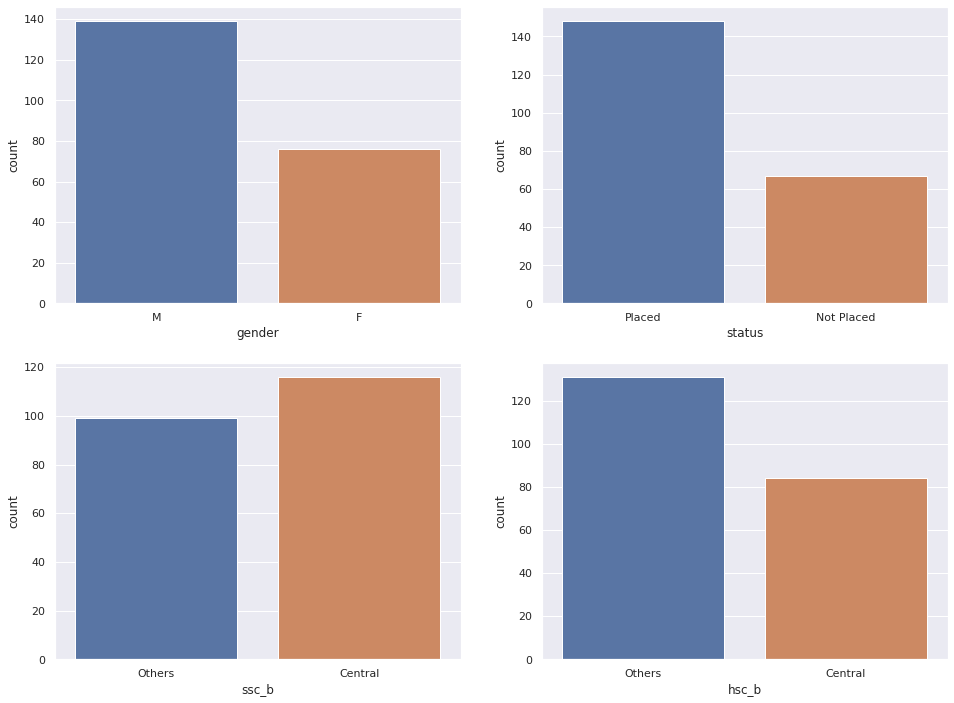

In [8]:
fig, a1 = plt.subplots(2, 2,figsize=(16,12))
sns.countplot(x = "gender", data = campus_DF, ax = a1[0,0])
sns.countplot(x = "status", data = campus_DF, ax = a1[0,1])
sns.countplot(x = "ssc_b", data = campus_DF, ax = a1[1,0])
sns.countplot(x = "hsc_b", data = campus_DF, ax = a1[1,1])
plt.show()

There is a majority of male students in this degree. The university has a placement rate of 68.84%. 

Almost 54% of the students were enrolled in the Central Board when they were in secondary school. The percentage has risen to almost 61%, when they moved on to higher secondary school.

### Higher Secondary School/UG/MBA Specialisations and Work Experience

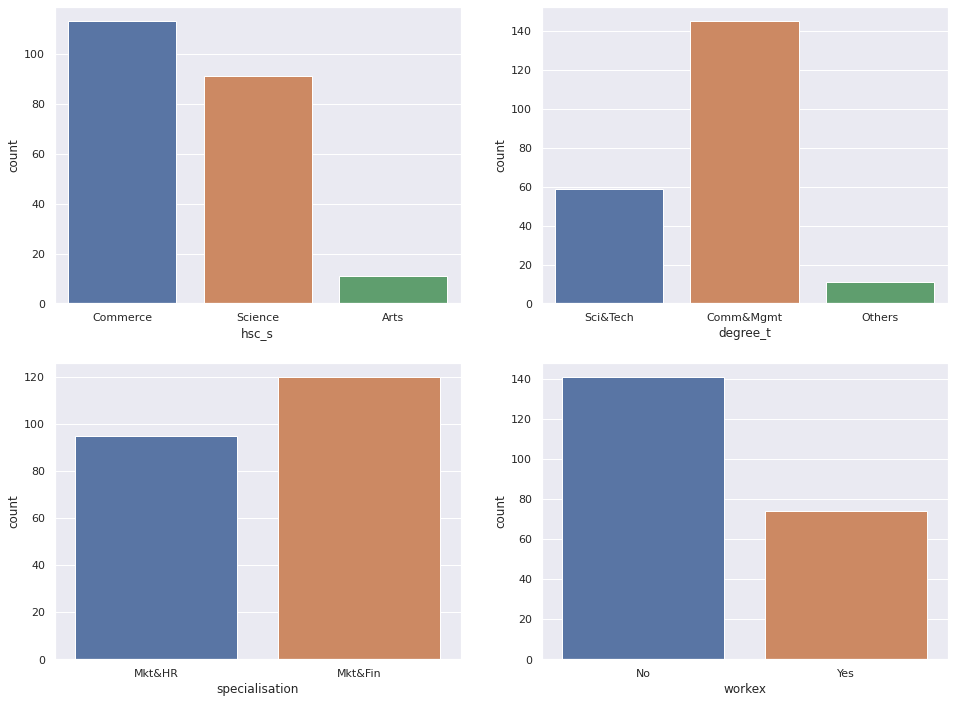

In [9]:
fig, a2 = plt.subplots(2, 2,figsize=(16,12))
sns.countplot(x = "hsc_s", data = campus_DF, ax = a2[0,0])
sns.countplot(x = "degree_t", data = campus_DF, ax = a2[0,1])
sns.countplot(x = "specialisation", data = campus_DF, ax = a2[1,0])
sns.countplot(x = "workex", data = campus_DF, ax = a2[1,1])
plt.show()

Majority of the students were enrolled commerce or science when they were in higher secondary. Howevere, there is a notable rise in students who studied commerce and management, when they were undergraduates. It could be possible that these students have planned on pursuing MBA, which requires in-depth knowledge about finance and management.

Two-thirds of the students have no work experience. 56% of the students enrolled in the Marketing and Finance, while the remaining have enrolled in Marketing and HR. 

## Which Categorical Features Affect Employment?

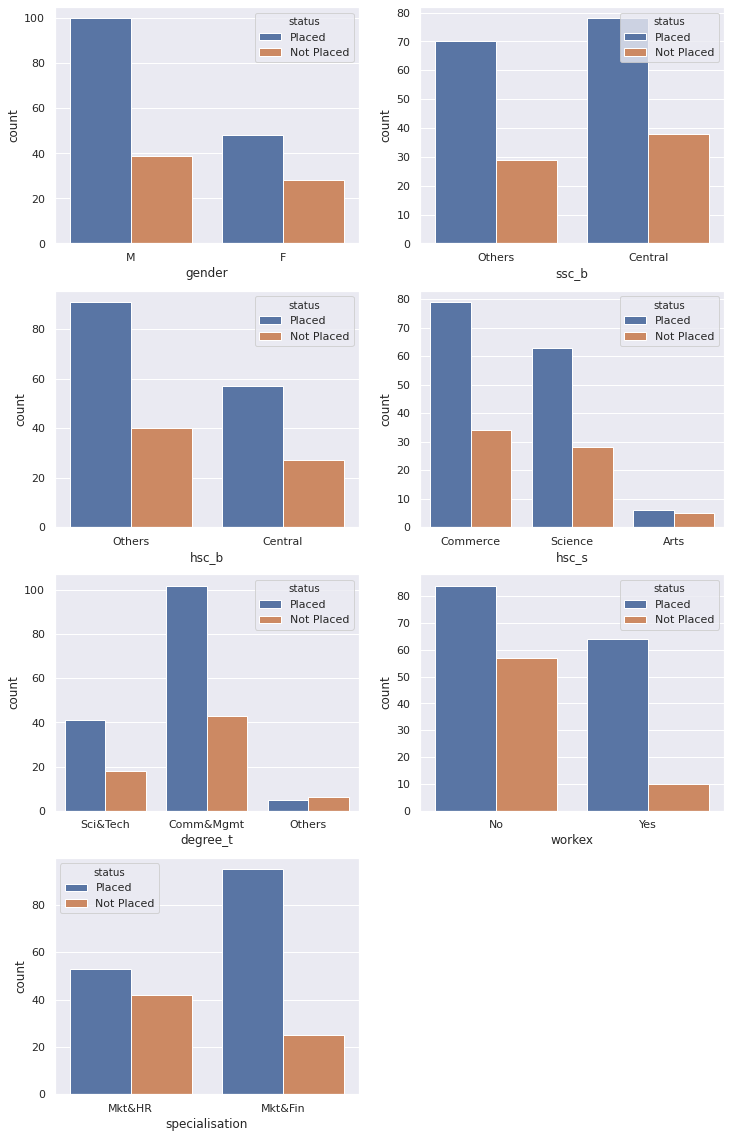

In [10]:
f, axes = plt.subplots(4, 2,figsize=(12,20))
sns.countplot(x = "gender", hue = "status", data = campus_DF, ax = axes[0,0])
sns.countplot(x = "ssc_b", hue = "status", data = campus_DF, ax = axes[0,1])
sns.countplot(x = "hsc_b", hue = "status", data = campus_DF, ax = axes[1,0])
sns.countplot(x = "hsc_s", hue = "status", data = campus_DF, ax = axes[1,1])
sns.countplot(x = "degree_t", hue = "status", data = campus_DF, ax = axes[2,0])
sns.countplot(x = "workex", hue = "status", data = campus_DF, ax = axes[2,1])
sns.countplot(x = "specialisation", hue = "status", data = campus_DF, ax = axes[3,0])
f.delaxes(axes[3,1])
plt.show()

Here is some additonal information about the plots above:
* 71.9% of the male students and 63.1% of the female students were placed. 
* 52.7% of the students who were placed were enrolled in Central board when they were in secondary school. 67.2% of the students who were in Central board were employed, whereas 70.7% of students who weren't in Central board got jobs.
* 61.5% of the placed students were previously enrolled in other boards. 69.5% of the students who were in other boards were placed while 67.9% of Central board students were placed.
* 53.4% of the placed students had pursued commerce in higher secondary school and 42.6% of them pursued science. 69.9% of commerce students and 69.2% of science students were employed.
* 68.9% of the placed students were enrolled in Commerce & Management in UG degree. 
* 56.8% of all placed students have no work experience. However, students with work experience have a higher placement rate, 59.6% of students without work experience and 86.5% of students with work experience getting placed.
* The students who had enrolled in Marketing & Finance have had a higher success at getting placed (79.17% placement rate) when compared to students in Marketing & HR (55.8% placement rate).

## Analyzing Salaries

### How Much Do The Students Earn?

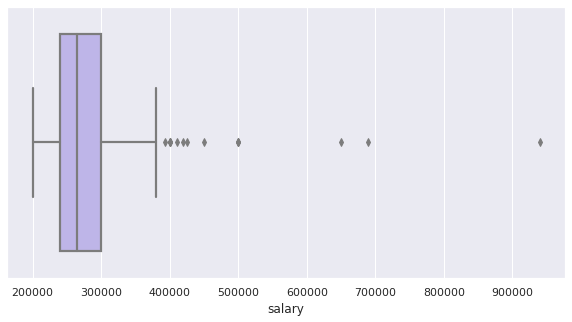

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(campus_DF_placed['salary'], color = '#b8adf0', linewidth = 2.2)
plt.show()

campus_DF_placed['salary'].describe()

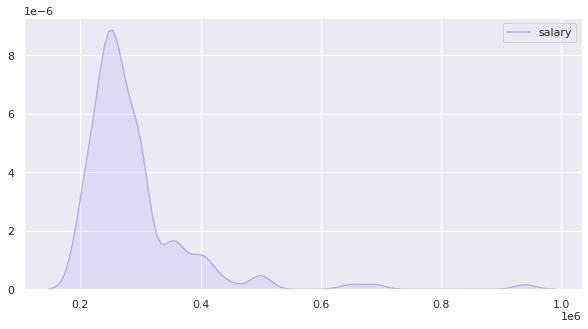

In [12]:
plt.figure(figsize=(10,5))
sns.kdeplot(campus_DF_placed['salary'], color = '#b8adf0', shade = True)
plt.show()

The lowest salary offered to a student is ₹2,00,000. The highest salary is ₹9,40,000. The average salary of the placed students is ₹2,88,655. The middle 50% of the students' salaries lies between ₹2,40,000 and ₹3,00,000.

### Salaries Categorized by Gender

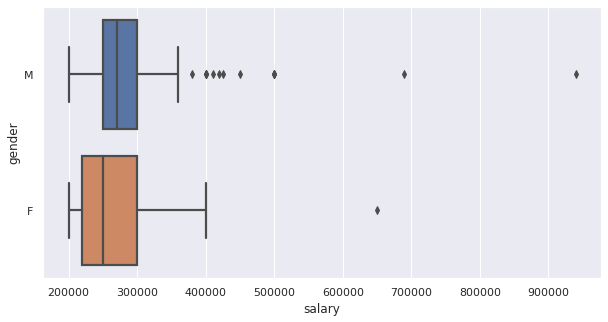

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'salary', y = 'gender', data = campus_DF_placed, linewidth = 2.2)
plt.show()

In [14]:
campus_DF_placed.groupby('gender').describe()['salary']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,48.0,267291.666667,75948.178955,200000.0,219500.0,250000.0,300000.0,650000.0
M,100.0,298910.000000,99514.792058,200000.0,250000.0,270000.0,300000.0,940000.0


The male students have a higher average salary than female students. The middle 50% for the female students has a higher range when compared to male students. Highest salary offered to a female student is ₹6,50,000 whereas it is ₹9,40,000 for a male student. Male students have more outliers, and thus there are more males that have been offered higher salaries when comapared to the majority of the students.

### Salaries Categorized by Secondary School Board

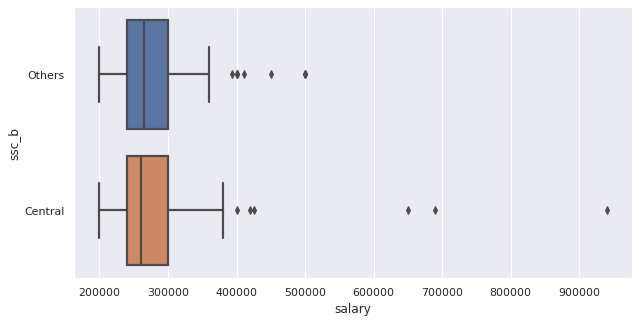

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'salary', y = 'ssc_b', data = campus_DF_placed, linewidth = 2.2)
plt.show()

In [16]:
campus_DF_placed.groupby('ssc_b').describe()['salary']

,count,mean,std,min,25%,50%,75%,max
ssc_b,,,,,,,,
Central,78.0,288166.666667,109534.601859,200000.0,240000.0,260000.0,300000.0,940000.0
Others,70.0,289200.000000,72238.453769,200000.0,240000.0,265000.0,300000.0,500000.0


While the salaries for Central board students have outliers that are spread out further, the secondary school board does not have an effect on the salaries. Highest salary offered to a Central board student is ₹9,40,000 whereas it is ₹5,00,000 for a non-Central board student.

### Salaries Categorized by Higher Secondary School Board

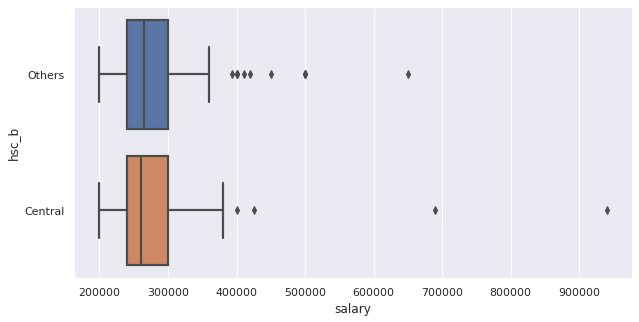

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'salary', y = 'hsc_b', data = campus_DF_placed, linewidth = 2.2)
plt.show()

In [18]:
campus_DF_placed.groupby('hsc_b').describe()['salary']

,count,mean,std,min,25%,50%,75%,max
hsc_b,,,,,,,,
Central,57.0,289543.859649,114227.384472,200000.0,240000.0,260000.0,300000.0,940000.0
Others,91.0,288098.901099,78399.695995,200000.0,240000.0,265000.0,300000.0,650000.0


While the salaries for Central board students have outliers that are spread out further, the higher secondary school board does not have an effect on the salaries. Highest salary offered to a Central board student is ₹9,40,000 whereas it is ₹6,50,000 for a non-Central board student.

### Salaries Categorized by Higher Secondary School Specialisation

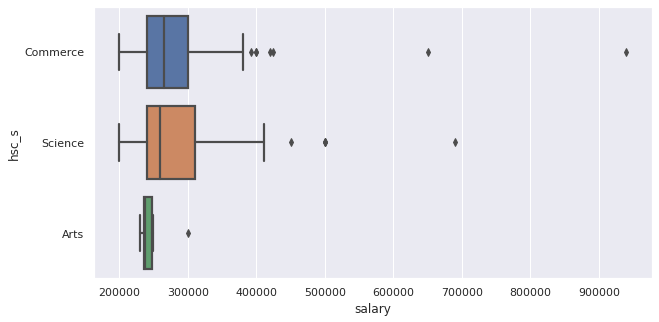

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'salary', y = 'hsc_s', data = campus_DF_placed, linewidth = 2.2)
plt.show()

In [20]:
campus_DF_placed.groupby('hsc_s').describe()['salary']

,count,mean,std,min,25%,50%,75%,max
hsc_s,,,,,,,,
Arts,6.0,248666.666667,26005.127699,230000.0,236000.0,238000.0,247500.0,300000.0
Commerce,79.0,287417.721519,100015.333132,200000.0,240000.0,265000.0,300000.0,940000.0
Science,63.0,294015.873016,88790.709348,200000.0,240000.0,260000.0,310000.0,690000.0


Arts students have been offered the worst salary packages out of the bunch. The range of salaries offered to science students is larger. Highest salary packages offered are ₹9,40,000 for a commerce student, ₹6,90,000 for a science student and ₹3,00,000 for an arts student.

### Salaries Categorized by UG Degree

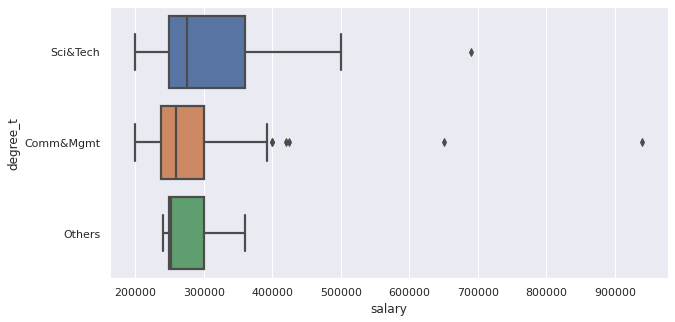

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'salary', y = 'degree_t', data = campus_DF_placed, linewidth = 2.2)
plt.show()

In [22]:
campus_DF_placed.groupby('degree_t').describe()['salary']

,count,mean,std,min,25%,50%,75%,max
degree_t,,,,,,,,
Comm&Mgmt,102.0,278627.450980,90935.285614,200000.0,237000.0,260000.0,300000.0,940000.0
Others,5.0,280400.000000,50207.569150,240000.0,250000.0,252000.0,300000.0,360000.0
Sci&Tech,41.0,314609.756098,100056.203718,200000.0,250000.0,275000.0,360000.0,690000.0


Science & Technology students have the highest average, in terms of income. However, Commerce & Management students were able to procure more highly paid jobs. 

### Salaries Categorized by Work Experience

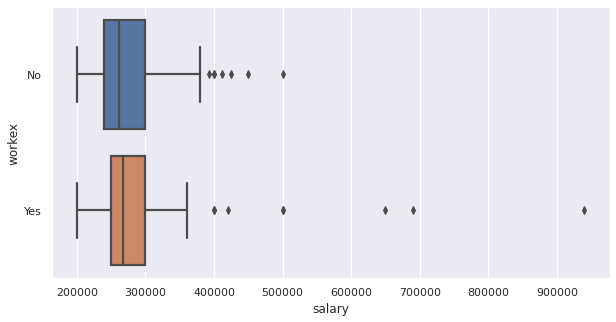

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'salary', y = 'workex', data = campus_DF_placed, linewidth = 2.2)
plt.show()

In [24]:
campus_DF_placed.groupby('workex').describe()['salary']

,count,mean,std,min,25%,50%,75%,max
workex,,,,,,,,
No,84.0,277523.809524,61643.255856,200000.0,240000.0,262000.0,300000.0,500000.0
Yes,64.0,303265.625000,122440.817215,200000.0,250000.0,267500.0,300000.0,940000.0


Both students, with and without work experience, have been offered minimum salaries of ₹2,00,000. On average, students with work experiences have received higher salaries due to the larger number of outliers. Highest salary offered to a student with work experience is ₹9,40,000 and highest salary offered to a student with no work experience is ₹5,00,000.

### Salaries Categorized by MBA Specialization

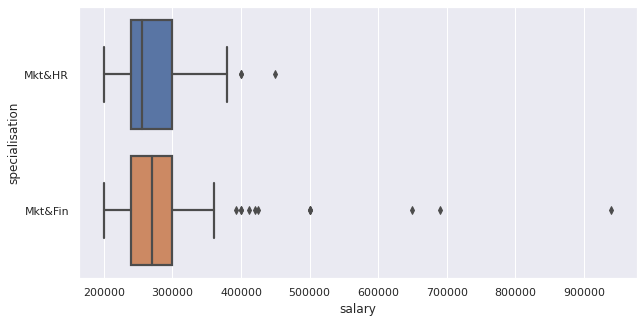

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'salary', y = 'specialisation', data = campus_DF_placed, linewidth = 2.2)
plt.show()

In [26]:
campus_DF_placed.groupby('specialisation').describe()['salary']

,count,mean,std,min,25%,50%,75%,max
specialisation,,,,,,,,
Mkt&Fin,95.0,298852.631579,108190.530165,200000.0,240000.0,270000.0,300000.0,940000.0
Mkt&HR,53.0,270377.358491,54784.271471,200000.0,240000.0,255000.0,300000.0,450000.0


Marketing & Finance students have a higher average salary. The maximum salary offered to a Marketing & Finance student (₹9,40,000) is significantly larger when compared to the maximum salary of a Marketing & HR student (₹4,50,000). There are more outliers in Marketing & Finance, which means that there are more opportunities for higher paid jobs in this specialisation.

## Analyzing the Students' Scores
Let's take a look at the overall percentages these students scored in secondary, higher secondary, UG, the employability test and PG.

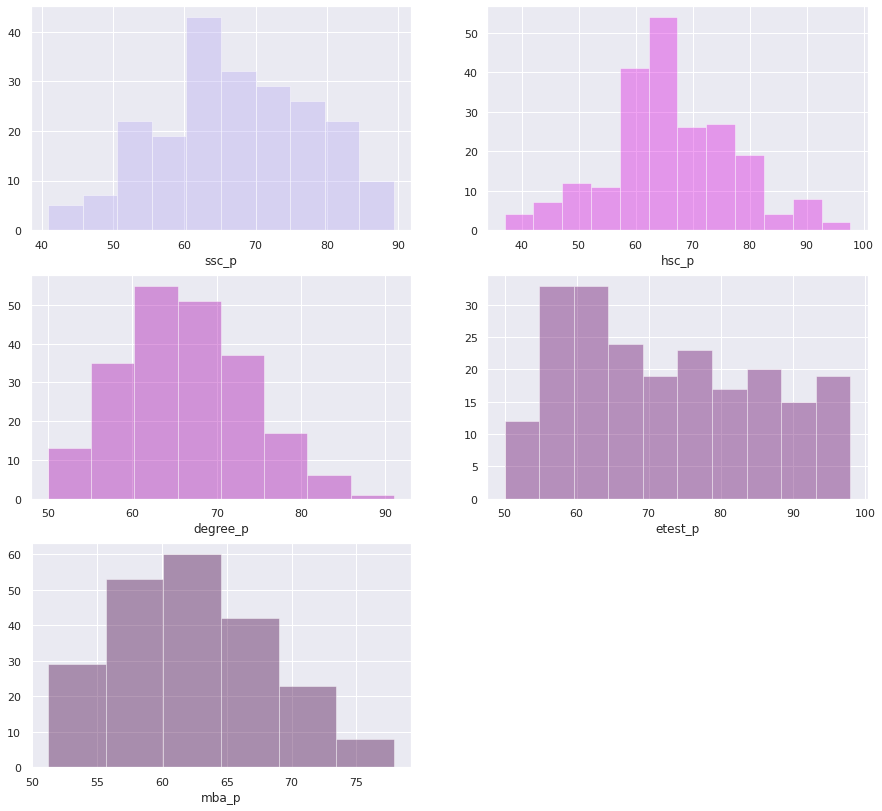

In [27]:
f, ax2 = plt.subplots(3,2,figsize = (15,14))
sns.distplot(campus_DF['ssc_p'], bins = 10, color = '#b8adf0', kde = False, ax = ax2[0,0])
sns.distplot(campus_DF['hsc_p'], bins = 12, color = '#da19e0', kde = False, ax = ax2[0,1])
sns.distplot(campus_DF['degree_p'], bins = 8, color = '#ab0eb0', kde = False, ax = ax2[1,0])
sns.distplot(campus_DF['etest_p'], bins = 10, color = '#660769', kde = False, ax = ax2[1,1])
sns.distplot(campus_DF['mba_p'], bins = 6, color = '#450247', kde = False, ax = ax2[2,0])
f.delaxes(ax2[2,1])
plt.show()

### Do Employability Test Scores Affect Placement?

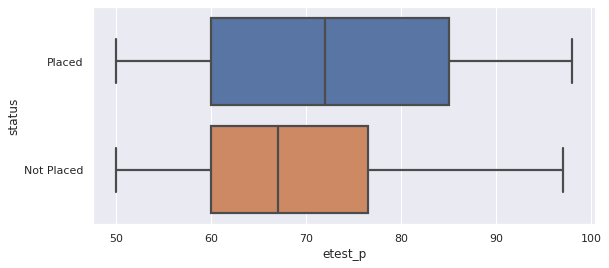

In [28]:
plt.figure(figsize=(9,4))
sns.boxplot(x = 'etest_p', y = 'status', data = campus_DF, linewidth = 2.2)
plt.show()

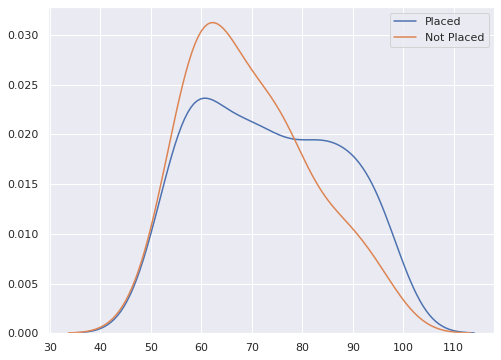

In [29]:
plt.figure(figsize=(8,6))
sns.kdeplot(campus_DF['etest_p'].loc[campus_DF['status']=='Placed'])
sns.kdeplot(campus_DF['etest_p'].loc[campus_DF['status']=='Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.show()

In [30]:
campus_DF.groupby('status').describe()['etest_p']

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Not Placed,67.0,69.587910,11.930687,50.0,60.0,67.0,76.5,97.0
Placed,148.0,73.238041,13.729333,50.0,60.0,72.0,85.0,98.0


The employability percentages for placed students have a higher median and average. The IQR is higher for the placed students. However, students with similar employability percentages have faced different outcomes in terms of placements. The employability tests do not seem like a clear indicator for placements, as the KDE plot above shows a major overlap of employability test percentages.

### Do MBA Test Scores Affect Placement?

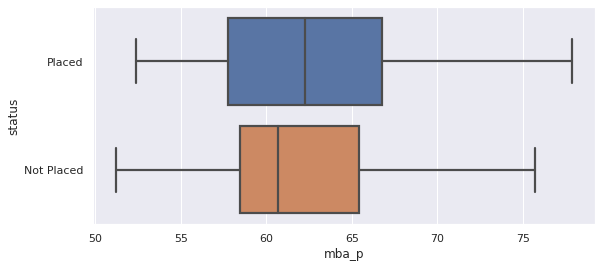

In [31]:
plt.figure(figsize=(9,4))
sns.boxplot(x = 'mba_p', y = 'status', data = campus_DF, linewidth = 2.2)
plt.show()

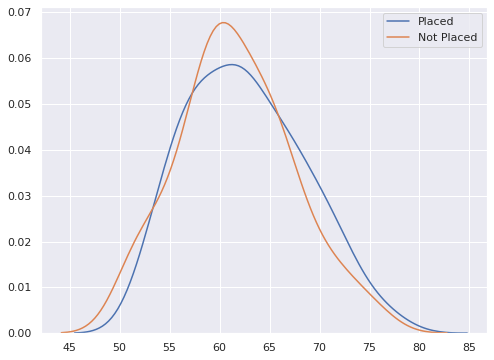

In [32]:
plt.figure(figsize=(8,6))
sns.kdeplot(campus_DF['mba_p'].loc[campus_DF['status']=='Placed'])
sns.kdeplot(campus_DF['mba_p'].loc[campus_DF['status']=='Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.show()

In [33]:
campus_DF.groupby('status').describe()['mba_p']

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Not Placed,67.0,61.612836,5.705689,51.21,58.4800,60.690,65.405,75.71
Placed,148.0,62.579392,5.884583,52.38,57.7725,62.245,66.760,77.89


MBA test scores don't seem to have an adverse effect on placements. The figures for both placed and unplaced students are similar.

### Do UG Degree Test Scores Affect Placement?

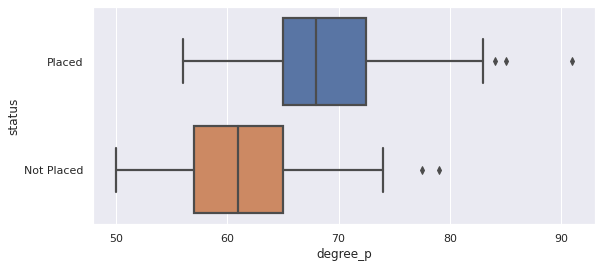

In [34]:
plt.figure(figsize=(9,4))
sns.boxplot(x = 'degree_p', y = 'status', data = campus_DF, linewidth = 2.2)
plt.show()

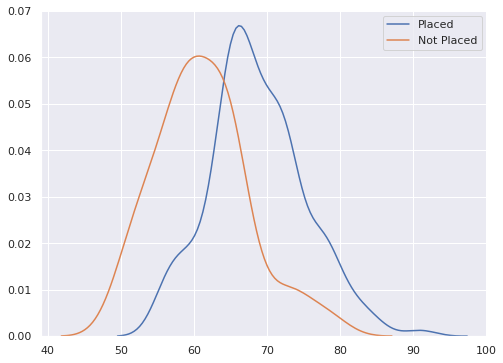

In [35]:
plt.figure(figsize=(8,6))
sns.kdeplot(campus_DF['degree_p'].loc[campus_DF['status']=='Placed'])
sns.kdeplot(campus_DF['degree_p'].loc[campus_DF['status']=='Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.show()

In [36]:
campus_DF.groupby('status').describe()['degree_p']

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Not Placed,67.0,61.134179,6.365825,50.0,57.0,61.0,65.0000,79.0
Placed,148.0,68.740541,6.518087,56.0,65.0,68.0,72.4225,91.0


There is clear indication that UG degree scores have a relatively greater influence on placement, even if there is an overlap in both graphs. Students need to score more than 50% in their UG degree to get placed. Placed students, in general, have a higher average percentage.

### Do Higher Secondary School Test Scores Affect Placement?

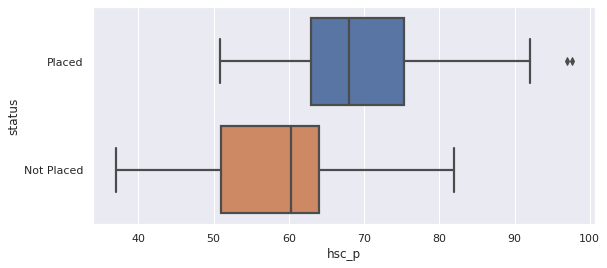

In [37]:
plt.figure(figsize=(9,4))
sns.boxplot(x = 'hsc_p', y = 'status', data = campus_DF, linewidth = 2.2)
plt.show()

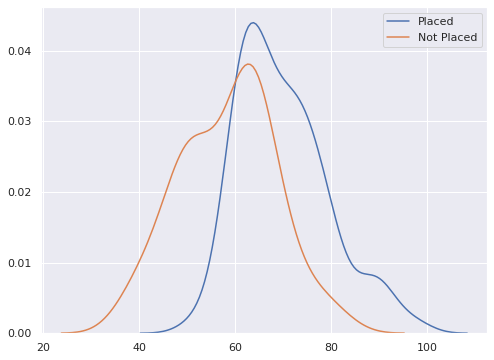

In [38]:
plt.figure(figsize=(8,6))
sns.kdeplot(campus_DF['hsc_p'].loc[campus_DF['status']=='Placed'])
sns.kdeplot(campus_DF['hsc_p'].loc[campus_DF['status']=='Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.show()

In [39]:
campus_DF.groupby('status').describe()['hsc_p']

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Not Placed,67.0,58.395522,9.914090,37.00,51.0,60.33,64.00,82.0
Placed,148.0,69.926554,9.329268,50.83,63.0,68.00,75.25,97.7


Students need to score more than 60% in higher secondary school to get placed. Placed students, in general, have a higher mean and median percentage.

### Do Secondary School Test Scores Affect Placement?

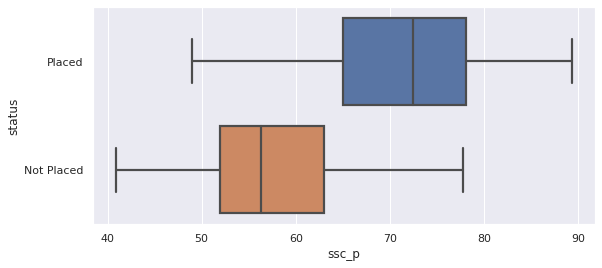

In [40]:
plt.figure(figsize=(9,4))
sns.boxplot(x = 'ssc_p', y = 'status', data = campus_DF, linewidth = 2.2)
plt.show()

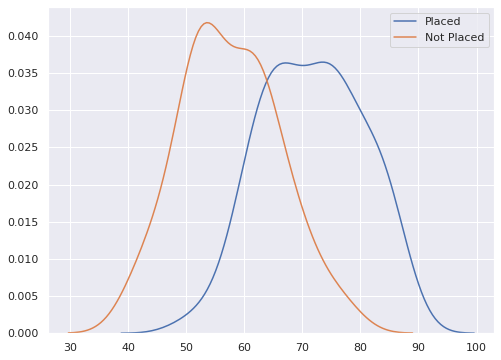

In [41]:
plt.figure(figsize=(8,6))
sns.kdeplot(campus_DF['ssc_p'].loc[campus_DF['status']=='Placed'])
sns.kdeplot(campus_DF['ssc_p'].loc[campus_DF['status']=='Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.show()

In [42]:
campus_DF.groupby('status').describe()['ssc_p']

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Not Placed,67.0,57.544030,8.394246,40.89,52.0,56.28,63.000,77.8
Placed,148.0,71.721486,8.715445,49.00,65.0,72.50,78.125,89.4


Out of all the test scores, secondary school percentages seem to have the greatest influence on placements. Placed students have a higher average percentage and a higher median.

## Future Developments
* A deeper analysis of all the features
* Predicting the placement of a student